In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Example

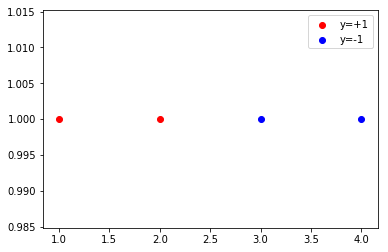

In [3]:
# toy data
X = np.array([[1],
              [2],
              [3],
              [4]])

b = np.array([[1],
              [1],
              [-1],
              [-1]])

x_range = np.ones((2,1))
plt.scatter(X[:2], x_range, color="red", label="y=+1")
plt.scatter(X[2:], x_range, color="blue", label="y=-1")

plt.legend()
plt.show()

In [6]:
# model parameters
num_features = len(X[0])
num_samples = len(b)
w_k = np.zeros((num_features+1, 1))
X_svm = np.hstack((X, np.ones((num_samples, 1))))

r = 0 # regularizer (aka lambda)
U, s, V = np.linalg.svd(X_svm)
tau = 1/s[0]**2 # max stepsize

# form binary labels
train_class = 1
b_svm = np.where(b == train_class, 1, -1)


# train svm
num_steps = 1000
for i in range(num_steps):
    # loop through training samples
    l_hinge = np.zeros(w_k.shape)
    for s in range(num_samples):
        # indicator function
        if b_svm[s]*X_svm[s]@w_k < 1:
            l_hinge = np.add(l_hinge, -b_svm[s]*X_svm[s].reshape(l_hinge.shape))

    w_k = w_k - tau*(l_hinge + 2*r*w_k)
print(w_k)

[[-2.03585381]
 [ 5.08963453]]


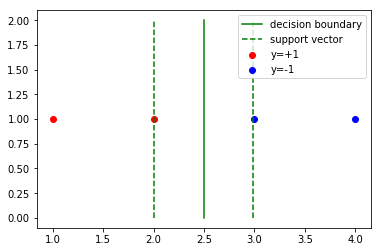

In [7]:
def svm_contour(w, c):
    x_plot = (c-w[1])/w[0]
    return x_plot

db = svm_contour(w_k, 0)
db_pos1 = svm_contour(w_k, 1)
db_neg1 = svm_contour(w_k, -1)

x_range = np.ones((2,1))
plt.scatter(X[:2], x_range, color="red", label="y=+1")
plt.scatter(X[2:], x_range, color="blue", label="y=-1")

space = 2
db_range = np.linspace(db,db,num=space)
db_range_pos1 = np.linspace(db_pos1,db_pos1,num=space)
db_range_neg1 = np.linspace(db_neg1,db_neg1,num=space)
x_range = np.linspace(0,2,num=space)
plt.plot(db_range,x_range, color="green", label="decision boundary")
plt.plot(db_range_pos1,x_range, color="green", linestyle="--", label="support vector")
plt.plot(db_range_neg1,x_range, color="green", linestyle="--")
plt.legend()
plt.show()

# 2D Example

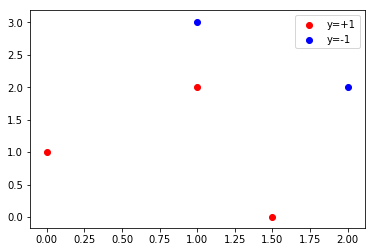

In [8]:
# toy data
X = np.array([[1, 2],
              [0, 1],
              [1.5, 0],
              [1, 3],
              [2, 2]])

b = np.array([[1],
              [1],
              [1],
              [-1],
              [-1]])


plt.scatter(X[:3,0], X[:3,1], color="red", label="y=+1")
plt.scatter(X[3:,0], X[3:,1], color="blue", label="y=-1")

plt.legend()
plt.show()

In [22]:
# compare against sklearn - can test different kernels


# model parameters
num_samples = len(b)
X_svm = np.hstack((X, np.ones((num_samples, 1))))
num_features = len(X[0])
w_k = np.zeros((num_features+1, 1))

r = 10 # regularizer (aka lambda)
U, s, V = np.linalg.svd(X_svm)
tau = 1/s[0]**2 # max stepsize

# form binary labels
train_class = 1
b_svm = np.where(b == train_class, 1, -1)

# train svm
num_steps = 1000
for i in range(num_steps):
    # loop through training samples
    l_hinge = np.zeros(w_k.shape)
    for s in range(num_samples):
        # indicator function
        if b_svm[s]*X_svm[s]@w_k < 1:
            l_hinge = np.add(l_hinge, -b_svm[s]*X_svm[s].reshape(l_hinge.shape))
    w_k = w_k - tau*(l_hinge+2*r*w_k)
print(w_k)

[[-0.025]
 [-0.1  ]
 [ 0.05 ]]


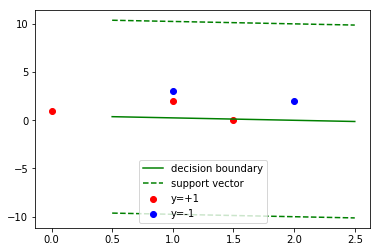

In [23]:
def svm_contour(x, w, c):
    x_plot = (c-x*w[0]-w[2])/w[1]
    return x_plot

plot_bounds = [0.5, 2.5]
db = [svm_contour(plot_bounds[0], w_k, 0), svm_contour(plot_bounds[1], w_k, 0)] 
db_pos1 = [svm_contour(plot_bounds[0], w_k, 1), svm_contour(plot_bounds[1], w_k, 1)] 
db_neg1 = [svm_contour(plot_bounds[0], w_k, -1), svm_contour(plot_bounds[1], w_k, -1)] 

plt.scatter(X[:3,0], X[:3,1], color="red", label="y=+1")
plt.scatter(X[3:,0], X[3:,1], color="blue", label="y=-1")

space = 2
plt.plot(plot_bounds,db, color="green", label="decision boundary")
plt.plot(plot_bounds,db_pos1, color="green", linestyle="--", label="support vector")
plt.plot(plot_bounds,db_neg1, color="green", linestyle="--")
plt.legend()
plt.show()